In [1]:
# Install necessary libraries
!pip install pandas numpy scikit-learn matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
import pandas as pd

# Upload the dataset manually
uploaded = files.upload()

# Get the file name dynamically
filename = list(uploaded.keys())[0]

# Load the dataset into a DataFrame
df = pd.read_csv(filename)

# Display the first few rows
df.head()

Saving accident.csv to accident.csv


,index,accident_id,ST_CASE,VE_TOTAL,VE_FORMS,PEDS,PERSONS,COUNTY,county_name,CITY,...,A_POLPUR,a_polour_lit,A_POSBAC,a_posbac_lit,A_DIST,a_dist_lit,A_DROWSY,a_drowsy_lit,INDIAN_RES,indian_res_lit
0,0,2012040001,40001,1,1,0,1,19,PIMA,0,...,2,Other Crash,1,Driver With Positive BAC Testing Crash,2,Other Crash,2,Other Crash,0,Not Tribal Lands
1,1,2012040002,40002,1,1,0,2,25,YAVAPAI,90,...,2,Other Crash,1,Driver With Positive BAC Testing Crash,2,Other Crash,2,Other Crash,0,Not Tribal Lands
2,2,2012040003,40003,1,1,1,0,13,MARICOPA,370,...,2,Other Crash,2,All Drivers With ZERO BAC Testing Crash,2,Other Crash,2,Other Crash,0,Not Tribal Lands
3,3,2012040004,40004,2,2,0,2,13,MARICOPA,190,...,2,Other Crash,2,All Drivers With ZERO BAC Testing Crash,2,Other Crash,2,Other Crash,0,Not Tribal Lands
4,4,2012040005,40005,2,2,0,4,19,PIMA,530,...,2,Other Crash,3,Unknown BAC Crash,2,Other Crash,2,Other Crash,0,Not Tribal Lands


In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display only columns that have missing values
missing_values = missing_values[missing_values > 0]

print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
FUNC_SYS    1112
ROAD_FNC     748
RD_OWNER    1112
TWAY_ID2    1311
cf1_lit     1804
cf2_lit     1857
cf3_lit     1859
dtype: int64


In [4]:
# Check dataset info
df.info()

# Display number of unique values per column
print("\nUnique Values Per Column:")
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860 entries, 0 to 1859
Data columns (total 80 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           1860 non-null   int64  
 1   accident_id     1860 non-null   int64  
 2   ST_CASE         1860 non-null   int64  
 3   VE_TOTAL        1860 non-null   int64  
 4   VE_FORMS        1860 non-null   int64  
 5   PEDS            1860 non-null   int64  
 6   PERSONS         1860 non-null   int64  
 7   COUNTY          1860 non-null   int64  
 8   county_name     1860 non-null   object 
 9   CITY            1860 non-null   int64  
 10  city_name       1860 non-null   object 
 11  DAY             1860 non-null   int64  
 12  MONTH           1860 non-null   int64  
 13  YEAR            1860 non-null   int64  
 14  HOUR            1860 non-null   int64  
 15  MINUTE          1860 non-null   int64  
 16  NHS             1860 non-null   int64  
 17  FUNC_SYS        748 non-null    f

In [5]:
# Drop columns with too many missing values
df.drop(columns=['cf2_lit', 'cf3_lit', 'TWAY_ID2'], inplace=True)

# Fill missing values for numerical columns with median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values for categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Confirm missing values are handled
print("Missing values after cleaning:")
print(df.isnull().sum().sum())  # Should print 0 if all missing values are handled

Missing values after cleaning:
0


In [6]:
columns_to_drop = ['index', 'accident_id', 'ST_CASE', 'func_sys_lit', 'road_fnc_lit', 'rd_owner_lit']
df.drop(columns=columns_to_drop, inplace=True)

# Confirm changes
print("Remaining columns after dropping unnecessary features:")
print(df.columns)

Remaining columns after dropping unnecessary features:
Index(['VE_TOTAL', 'VE_FORMS', 'PEDS', 'PERSONS', 'COUNTY', 'county_name',
       'CITY', 'city_name', 'DAY', 'MONTH', 'YEAR', 'HOUR', 'MINUTE', 'NHS',
       'FUNC_SYS', 'ROAD_FNC', 'RD_OWNER', 'TWAY_ID', 'LATITUDE', 'LONGITUD',
       'SP_JUR', 'sp_jur_lit', 'HARM_EV', 'harm_ev_lit', 'MAN_COLL',
       'man_coll_lit', 'RELJCT1', 'RELJCT2', 'TYP_INT', 'WRK_ZONE', 'REL_ROAD',
       'LGT_COND', 'lgt_cond_lit', 'WEATHER', 'weather_lit', 'SCH_BUS', 'CF1',
       'CF2', 'CF3', 'cf1_lit', 'FATALS', 'A_INTER', 'a_inter_lit', 'A_ROADFC',
       'a_road_fc_lit', 'A_TOD', 'a_tod_lit', 'A_DOW', 'a_dow_lit', 'A_LT',
       'a_lt_lit', 'A_SPCRA', 'a_spcra_lit', 'A_PED', 'a_ped_lit', 'A_PED_F',
       'a_ped_f_lit', 'A_PEDAL', 'a_pedal_lit', 'A_PEDAL_F', 'a_pedal_f_lit',
       'A_POLPUR', 'a_polour_lit', 'A_POSBAC', 'a_posbac_lit', 'A_DIST',
       'a_dist_lit', 'A_DROWSY', 'a_drowsy_lit', 'INDIAN_RES',
       'indian_res_lit'],
      dtype='

<ipython-input-7-a3bd115bfd87>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['FATALS'], palette="viridis")


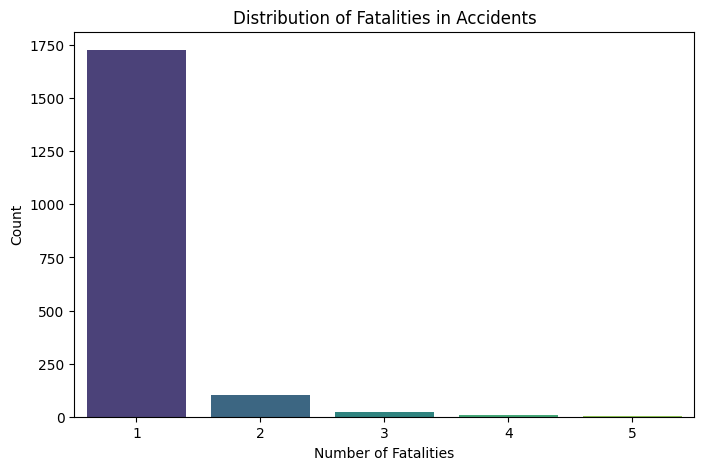

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of fatalities
plt.figure(figsize=(8,5))
sns.countplot(x=df['FATALS'], palette="viridis")
plt.title("Distribution of Fatalities in Accidents")
plt.xlabel("Number of Fatalities")
plt.ylabel("Count")
plt.show()

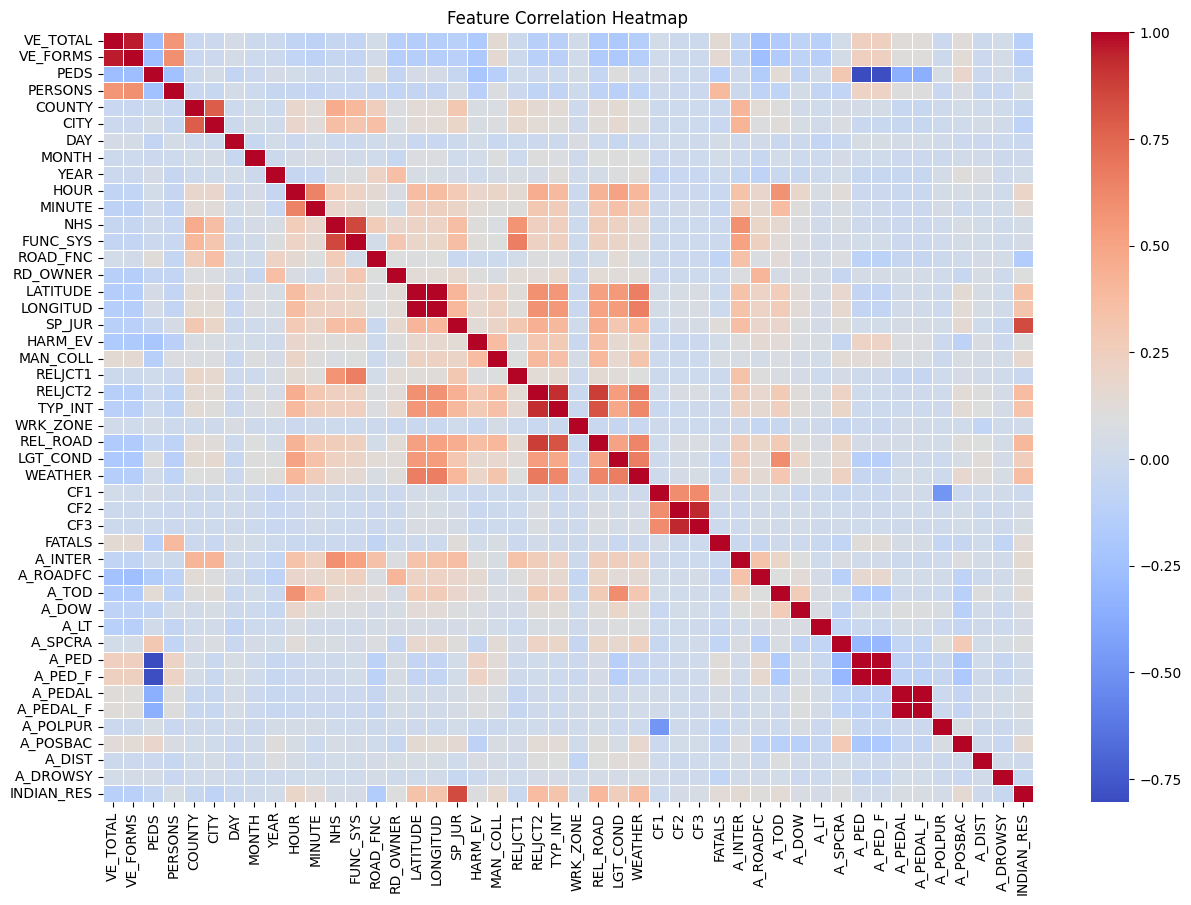

In [8]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
# Sort correlations with the target variable (FATALS)
fatality_correlation = correlation_matrix['FATALS'].sort_values(ascending=False)

# Display the most correlated features
print("Top Features Correlated with Fatalities:")
print(fatality_correlation)

Top Features Correlated with Fatalities:
FATALS        1.000000
PERSONS       0.384927
VE_FORMS      0.152509
VE_TOTAL      0.141856
INDIAN_RES    0.130341
SP_JUR        0.114870
A_PED         0.114694
A_PED_F       0.114058
MAN_COLL      0.058171
A_PEDAL_F     0.043354
A_PEDAL       0.043354
CF1           0.035046
DAY           0.031811
MONTH         0.026255
HARM_EV       0.021277
REL_ROAD      0.018227
RELJCT2       0.014740
A_DIST        0.012600
TYP_INT       0.005969
A_TOD         0.000907
LATITUDE     -0.001467
A_DOW        -0.003045
RD_OWNER     -0.004443
LONGITUD     -0.005507
CF3          -0.005694
YEAR         -0.006811
CF2          -0.008104
WRK_ZONE     -0.009886
WEATHER      -0.010511
RELJCT1      -0.016946
COUNTY       -0.019365
FUNC_SYS     -0.020067
NHS          -0.021000
HOUR         -0.022026
A_INTER      -0.023263
A_LT         -0.025089
MINUTE       -0.026454
LGT_COND     -0.032725
CITY         -0.035573
A_POSBAC     -0.044726
A_ROADFC     -0.046654
A_POLPUR     -0.

In [10]:
# Selecting the top relevant features based on correlation
selected_features = ['PERSONS', 'VE_FORMS', 'VE_TOTAL', 'INDIAN_RES', 'SP_JUR', 'A_PED', 'A_PED_F', 'MAN_COLL', 'ROAD_FNC', 'A_DROWSY']

# Define the target variable
target = 'FATALS'

# Create X (features) and y (target)
X = df[selected_features]
y = df[target]

# Display selected features
print("Selected Features for Model Training:")
print(X.head())

Selected Features for Model Training:
   PERSONS  VE_FORMS  VE_TOTAL  INDIAN_RES  SP_JUR  A_PED  A_PED_F  MAN_COLL  \
0        1         1         1           0       0      2        2         0   
1        2         1         1           0       0      2        2         0   
2        0         1         1           0       0      1        1         0   
3        2         2         2           0       0      2        2         6   
4        4         2         2           0       0      2        2         0   

   ROAD_FNC  A_DROWSY  
0      16.0         2  
1       4.0         2  
2      15.0         2  
3      15.0         2  
4       4.0         2  


In [11]:
from sklearn.model_selection import train_test_split

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset sizes
print(f"Training Set: {X_train.shape[0]} samples")
print(f"Testing Set: {X_test.shape[0]} samples")

Training Set: 1488 samples
Testing Set: 372 samples


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.9435


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn.metrics import classification_report

# Generate classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           1       0.95      1.00      0.97       351
           2       0.33      0.06      0.11        16
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2

    accuracy                           0.94       372
   macro avg       0.32      0.26      0.27       372
weighted avg       0.91      0.94      0.92       372



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
# Train a Random Forest Model:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=10,  # Limit tree depth to avoid overfitting
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.8306


In [15]:
from sklearn.metrics import classification_report

# Generate classification report
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:

              precision    recall  f1-score   support

           1       0.96      0.87      0.91       351
           2       0.08      0.19      0.11        16
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         0

    accuracy                           0.83       372
   macro avg       0.21      0.21      0.20       372
weighted avg       0.91      0.83      0.87       372



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
# Initialize an improved Random Forest model
rf_model_tuned = RandomForestClassifier(
    n_estimators=200,  # More trees for better learning
    max_depth=15,  # Allow deeper decision trees
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

# Train the improved model
rf_model_tuned.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_tuned = rf_model_tuned.predict(X_test)

# Calculate new accuracy
rf_tuned_accuracy = accuracy_score(y_test, y_pred_rf_tuned)
print(f"Tuned Random Forest Accuracy: {rf_tuned_accuracy:.4f}")

Tuned Random Forest Accuracy: 0.8280


In [17]:
# Generate classification report for the improved model
print("Tuned Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf_tuned))

Tuned Random Forest Classification Report:

              precision    recall  f1-score   support

           1       0.96      0.87      0.91       351
           2       0.05      0.12      0.07        16
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         0

    accuracy                           0.83       372
   macro avg       0.20      0.20      0.20       372
weighted avg       0.91      0.83      0.86       372



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


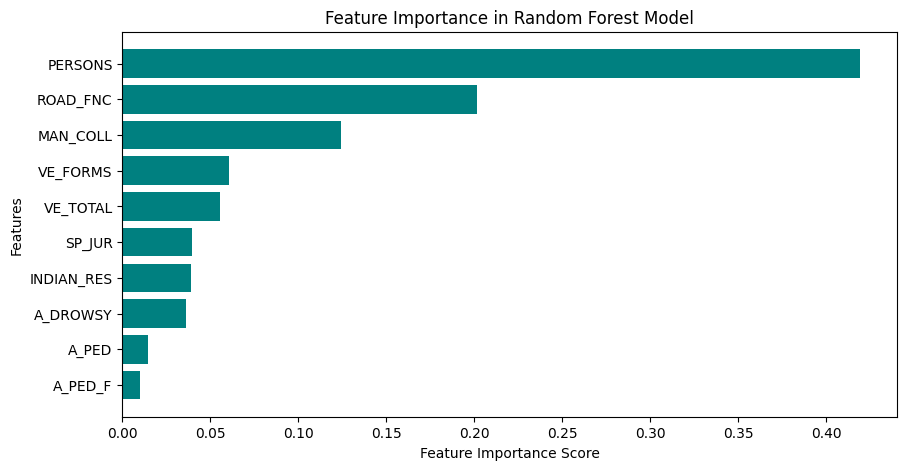

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from Random Forest model
feature_importance = rf_model_tuned.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = [X.columns[i] for i in sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(sorted_features, feature_importance[sorted_idx], color="teal")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()

In [19]:
# Print final accuracy scores
print(f"Final Logistic Regression Accuracy: {accuracy:.4f}")
print(f"Final Random Forest Accuracy: {rf_tuned_accuracy:.4f}")

Final Logistic Regression Accuracy: 0.9435
Final Random Forest Accuracy: 0.8280
